In [67]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

from  sklearn.model_selection import train_test_split
import seaborn as sns

In [68]:
iris = sns.load_dataset('iris')

In [69]:
data = torch.tensor( iris[iris.columns[0:4]].values ).float()

labels = torch.zeros(len(data), dtype=torch.long)

labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

In [70]:
def createANNmodel():
    ANNiris = nn.Sequential(
        nn.Linear(4,64),
        nn.ReLU(),
        nn.Linear(64,64),
        nn.ReLU(),
        nn.Linear(64,3),
    )

    lossfun = nn.CrossEntropyLoss()

    optimizer = torch.optim.SGD(ANNiris.parameters(), lr=.01)

    return ANNiris, lossfun, optimizer

In [71]:
numEpochs = 200


def trainTheModel(trainProp):
    losses = torch.zeros(numEpochs)
    trainAcc = []
    testAcc = []
    x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size=trainProp)

    for epochi in range(numEpochs):
        yHat = ANNiris(x_train)

        loss = lossfun(yHat, y_train)
        losses[epochi] = loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        trainAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1) == y_train).float()).item() )

        predlabels = torch.argmax(ANNiris(x_test), axis=1)
        testAcc.append( 100*torch.mean((predlabels == y_test).float()).item() )

    return trainAcc, testAcc

In [72]:
ANNiris, lossfun, optimizer = createANNmodel()

trainAcc, testAcc = trainTheModel(0.8)

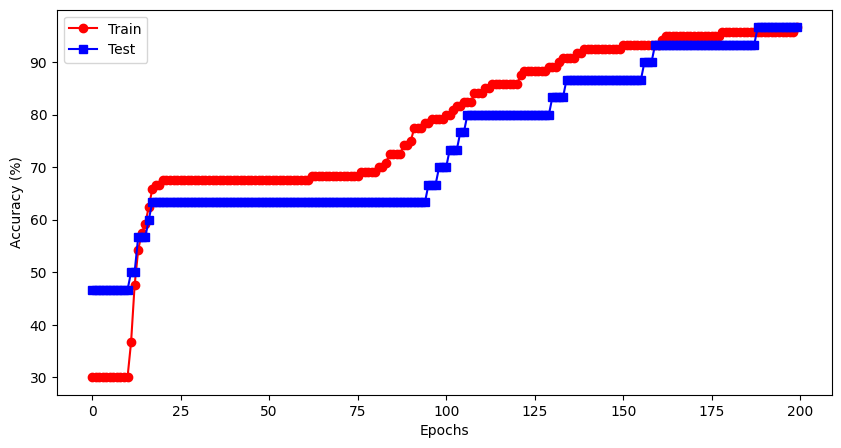

In [73]:
fig = plt.figure(figsize=(10,5))

plt.plot(trainAcc, 'ro-')
plt.plot(testAcc, 'bs-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend(['Train', 'Test'])
plt.show()

In [74]:
trainSetSizes = np.linspace(.2,.95,10)

allTrainAcc = np.zeros((len(trainSetSizes), numEpochs))
allTestAcc = np.zeros((len(trainSetSizes), numEpochs))

for i in range(len(trainSetSizes)):
    ANNiris, lossfun, optimizier = createANNmodel()

    trainAcc, testAcc = trainTheModel(trainSetSizes[i])

    allTrainAcc[i,:] = trainAcc

    allTestAcc[i,:] = testAcc

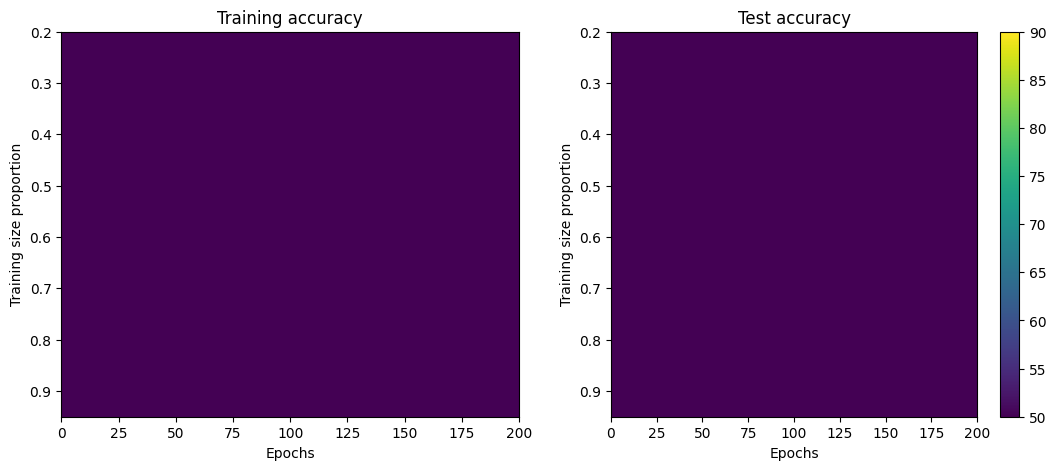

In [75]:
fig,ax = plt.subplots(1,2,figsize=(13,5))

ax[0].imshow(allTrainAcc,aspect='auto',
             vmin=50,vmax=90, extent=[0,numEpochs,trainSetSizes[-1],trainSetSizes[0]])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Training size proportion')
ax[0].set_title('Training accuracy')

p = ax[1].imshow(allTestAcc,aspect='auto',
             vmin=50,vmax=90, extent=[0,numEpochs,trainSetSizes[-1],trainSetSizes[0]])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training size proportion')
ax[1].set_title('Test accuracy')
fig.colorbar(p,ax=ax[1])

plt.show()